# ML Exam - Lab - Exam_2021_01_15
Julian Sherollari - [julian.sherollari@studio.unibo.it](mailto:julian.sherollari@studio.unibo.it)

In [2]:
import pandas as pd
import seaborn as sns
from plot_silhouette import plot_silhouette
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import MinMaxScaler
import numpy as np

rnd_state = 42

In [3]:
url = 'exam_2021_01_15.csv'
df = pd.read_csv(url, sep=',')

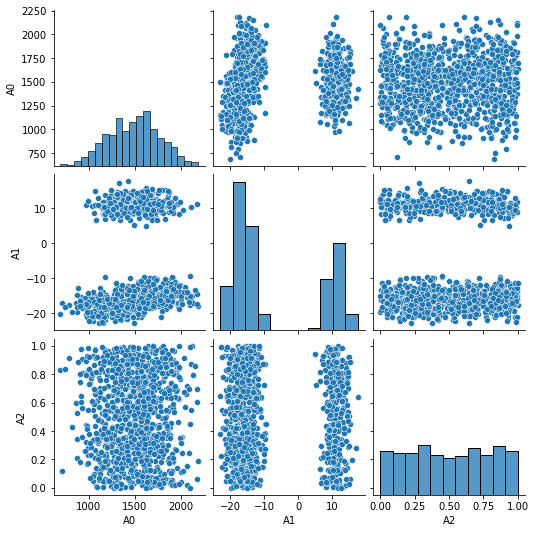

In [4]:
'''observing the pairplot, we can notice that there's an interesting pattern
for clustering if we consider A0 and A1'''

X = df.drop('y', axis=1)
y = df['y']

sns.pairplot(X);

In [5]:
'''I decide to use KMeans and as a consequence the elbow method to
determine the right value of K'''

K_range = range(2,10)
inertia_scores = []
silhouette_scores = []

for i in K_range:
    
    estimator = KMeans(n_clusters = i, random_state=rnd_state)
    
    estimations = estimator.fit_predict(X)
    
    inertia_scores.append(estimator.inertia_) 
    
    silhouette_scores.append(silhouette_score(X, estimations))
    

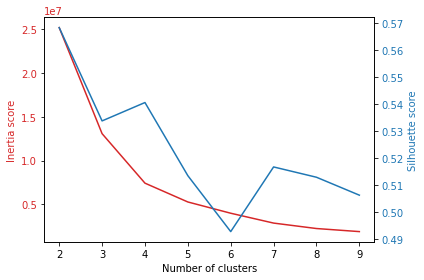

In [6]:
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Number of clusters')
ax1.set_ylabel('Inertia score', color=color)
ax1.plot(K_range, inertia_scores, color=color)
ax1.tick_params(axis='y',labelcolor=color)

ax2 = ax1.twinx()

color='tab:blue'
ax2.set_ylabel('Silhouette score',color=color)
ax2.plot(K_range, silhouette_scores, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()

In [7]:
'''At the end, I've chosen K=3 since if we observe the gold standard
we have 3 possible values'''

K = 3

K_estm = KMeans(n_clusters=K, random_state=rnd_state)

y_km = K_estm.fit_predict(X)

K_silhouette = silhouette_score(X, y_km)

print('This is the silhouette score for K =',K,':',K_silhouette)

This is the silhouette score for K = 3 : 0.5337106344943366


In [8]:
ykm_to_y = {}

labels = np.unique(y_km)

for label in labels:
    
    objects = y_km ==label
    counts = y[objects].value_counts()
    ykm_to_y[counts.index[0]] = label

mapped_y = y.map(ykm_to_y)

In [9]:
'''Actually, the comparison between y and y_km is good '''
confusion_matrix(mapped_y, y_km) 

array([[242,  89,   3],
       [ 84, 181,  68],
       [ 19, 150, 164]], dtype=int64)

In [19]:
X_preproc = df.drop(['A0','y'], axis=1)

mms = MinMaxScaler()
X_final = mms.fit_transform(X_preproc)

In [20]:
final_estimator = KMeans(n_clusters = K, random_state=rnd_state)

final_estimations = final_estimator.fit_predict(X_preproc)

finalestimations_to_y = {}

final_labels = np.unique(final_estimations)

for f_label in final_labels:
    
    f_objects = y_km == f_label
    f_counts = y[f_objects].value_counts()
    finalestimations_to_y[f_counts.index[0]] = f_label

final_mapped_y = y.map(finalestimations_to_y)

confusion_matrix(final_mapped_y, final_estimations)

array([[295,   0,  39],
       [  0, 333,   0],
       [ 77,   0, 256]], dtype=int64)